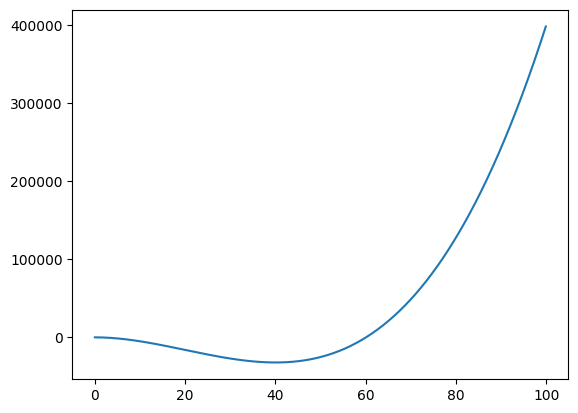

39.78060332087924 -32150.24487975278


In [1]:
from __future__ import division

import math

import matplotlib.pyplot as plt
import numpy as np


# define aim function
def aimFunction(x):
    y = x ** 3 - 60 * x ** 2 - 4 * x + 6
    return y


x = [i / 10 for i in range(1000)]
y = [0 for i in range(1000)]
for i in range(1000):
    y[i] = aimFunction(x[i])
plt.plot(x, y)
plt.show()
T = 1000  # initiate temperature
Tmin = 10  # minimum value of terperature
x = np.random.uniform(low=0, high=100)  # initiate x
k = 50  # times of internal circulation
y = 0  # initiate result
t = 0  # time
while T >= Tmin:
    for i in range(k):
        # calculate y
        y = aimFunction(x)
        # generate a new x in the neighboorhood of x by transform function
        xNew = x + np.random.uniform(low=-0.055, high=0.055) * T
        if (0 <= xNew and xNew <= 100):
            yNew = aimFunction(xNew)
            if yNew - y < 0:
                x = xNew
            else:
                # metropolis principle
                p = math.exp(-(yNew - y) / T)
                r = np.random.uniform(low=0, high=1)
                if r < p:
                    x = xNew
    t += 1
    T = 1000 / (1 + t)  #降温函数，也可使用T=0.9T
print(x, aimFunction(x))


[16 12 11  1  5 14  7  2 13 10 20  9  8  3 18 27 26 22  4 24 23 25 29  6
 21 17 15 28  0 19] 10.631522219445758 10.631522219445758


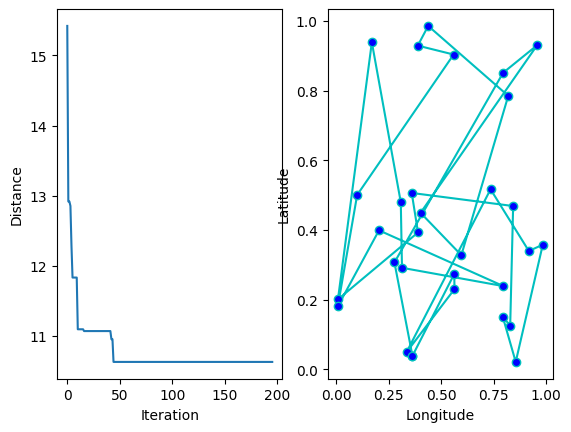

In [11]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 30

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=800, T_min=1, L=1000)

best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()